# 1.6 python_oop

# 1 Overview
1. In lecture "1.5", we learned some foundations of object-oriented programming.
2. The objectives of this lecture are
   - cover(**PI: ing**) OOP in more depth and
   - learn(**PI: ing**) how to build our own objects, specialized to our needs.
3. e.g.
   - We already know how to
     - create lists, strings and other Python objects and
     - use their methods to modify their contents.
   - Imagine now we want to write a program with consumers, who can
     - hold and spend cash
     - consume goods
     - work and earn cash
   - A natural solution in Python would be to create consumers as objects with
     - data, such as cash on hand,
     - methods, such as `buy` or `work` that affect this data.
4. Python makes it easy to do this, (**PI: remove ','**) by providing us with **class definitions**.
   - Classes are **blueprints** that help us build objects according to our specifications (**how to under this sentence?**)
   - It takes a little while to get used to the **syntax** so we will provide **plenty of examples**.

In [253]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 OOP Review
1. OOP is supported in many languages:
   - JAVA and Ruby are relatively pure OOP.
   - Python supports both procedural and object-oriented programming.
   - Fortran and MATLAB are mainly procedural, some OOP recently tacked on.
   - C is a procedural language, while C++ is C with OOP added on top.
   
2. Let's cover general OOP concepts before we specialize to(**PI: 'to' -> 'in'**) Python.

## 2.1 Key Concepts

1. As discussed (**PI: in**) "1.5", in the OOP paradigm, data and functions are **bundled together** into "objects".
   - An example is a **Python list**, 
     - It not only **stores data** but also 
     - knows how to **sort** itself, etc.
       - As we know, `sort` is a function that is "part of" the list object-- and hence called a **method**.
   - If we want to make our own types of objects(**PI:,**) we need to use **class** definitions.
2. A **class definition** is a **blueprint** for a particular class of objects (e.g., lists, strings or complex numbers).
   - It describes
     - what **kind of data** the class **stores** and
     - what **methods** it has for **acting** on these data.
   - An **object** or **instance** is a realization of the class, created from the blueprint
     - each **instance** has its own **unique** data, and 
     - **methods** set out in the class definition act on this (and other) data.
   - In Python, the data and methods of an object are collectively referred to as **attributes**.
     - **Attributes** are accessed via "dotted attribute notation".
       - `object_name.data`
       - `object_name.method_name()`
     - In the following e.g.
       - part 1: `x` is an object or instance, created from the definition for Python lists, but with its own practicular data.
       - part 2: `x.sort()` and `x.__class__` are two attributes of `x`.
       - part 3: `dir(x)` can be used to view all the attributes of `x` (**PI1: no example about `dir(x)`**).

In [4]:
# part 1
x = [1, 5, 4]
x.sort() # Sort elements in `x` ascendingly
x

[1, 4, 5]

In [5]:
# part 2
x = [1, 5, 4]
x.sort() # Sort elements in `x` ascendingly
x.__class__ # attributes

list

In [6]:
# part 3
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

## 2.2 Why is OOP useful?
1. **OOP** is useful for **recognizing and exploiting** the common **structure**.
   - The same reason why abstraction is useful.
   - e.g.,
     - a **Markov chain** consists of a set of states and a collection of transition probabilities for moving across states.
     - a **general equilibrium** theory consists of a commodity space, preferences, technologies, and an equilibrium definition.
     - a **game** consists of a list of players, lists of actions available to each player, player payoffs as functions of all players' actions, and a timing protocal.
   - These are all **abstractions** that collect together "**objects**" of the same "**type**".
     - Recognizing **common structure** allows us to employ **common tools**.
       - In economic theory, this might be a **proposition** that applies to **all games of a certain type**.
       - In Python, this might be a **method** that's useful for **all Markov chains** (e.g., `simulate`).
         - When we use OOP, the **`simulate` method** is conveniently bundled together with the **Markov chain object**.

# 3 Defining Our Own Classes
We will build some simple classes.

## 3.1 Example1: A Consumer Class
1. We will build a `Consumer` class with
   - a `wealth` **attribute** that stores the consumer's **wealth (data)**,
   - an `earn` **method**, 
     - where `earn(y)` increments the consumer's wealth by `y`,
   - a `spend` **method**, 
     - where `spend(x)` either decreases wealth by `x` or returns an error if insufficient funds exist.
2. There are some special syntax to step through carefully:
   - The `class` keyword indicates that we are building a class.
   - This **class** defines **instance data `wealth`** and **three methods**: `__init__`, `earn` and `spend`,
     - `wealth` is **instance data** because each consumer we create (each instance of the `Consumer` class) will have its own separate wealth data.
     - The ideas behind the `earn` and `spend` methods are discussed in "1".
       - Both of these act on the instance data `wealth`.
     - The `__init__` method is a **constructor method**.
       - Whenever we create an instance of the class, this method will be called **automatically**.
       - Calling `__init__` sets up a "**namespace**" to hold the instance data.
         - We will discuss it more soon.
         - We will also discuss the role of `self` soon.   

In [8]:
class Consumer:
    
    def __init__(self, w):
        "initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y
        
    def spend(self, x):
        "The consumer spend x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth

### Usage of the class

In [9]:
c1 = Consumer(10) # Create (**PI: an**) instance with initial wealth 10
c1.spend(5)       # 
c1.wealth

5

In [11]:
c1.earn(15)
c1.spend(100)

Insufficient funds


In [10]:
# We can create multiple instances each with its own data.
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [11]:
c1.wealth

10

1. Each instance stores its data in a separate namespace dictionary.
2. When we access or set attributes(**PI:,**) we are actually just modifying the dictionary maintained by the instance.

In [14]:
c1.__dict__

{'wealth': 10}

In [15]:
c2.__dict__

{'wealth': 8}

### Self

1. If we look at the `Consumer` class definition again(**PI:,**) we will see the word `self`(**PI:**) throughout the code.
2. The **rules with `self`** are that
   - Any **instance data** should be prepared with `self`,
     - e.g., the `earn` method references `self.wealth` rather than just `wealth`.
   - Any **method defined within** the class should have `self` as its first argument,
     - e.g., `def earn(self, y)` rather than just `def earn(y)`.
   - Any **method referenced within** the class should be called as `self.method_name`.
     - We will see it shortly.

### Details of Self and Class
1. We look at some more formal details related to **classes** and **`self`**,
   - We might wish to skip to Example 2 (**PI: 'the' between 'on' and 'first'**).
   - We can return to these details after we've familized ourselves with more examples.
2. Methods actually live inside a class object formed when the interpreter reads the class definition.
   - Note how the three methods `__init__`, `earn` and `spend` are stored in the class object.
   - Consider the code in Part 2.
     - When we call `earn` via `c1.earn(10)`(**PI: ,**) the interpreter passes the **instance `c1`** and the **argument `10`** to `Consumer.earn`.
     - In fact, `c1.earn(10)` and `Consumer.earn(c1, 10)` are equivalent.
       - In the function call `Consumer.earn(c1, 10)` note that `c1` is the first argument.
       - Recall that in the definition of the `earn` method, `self` is the first parameter.
         - The end result is that `self` is **bound** to the instance `c1` inside the function call.
         - That's why the statement `self.wealth += y` inside `earn` ends up modifying `c1.wealth`.

In [ ]:
# Part 1: Show __dict__ attribute of class object
print(Consumer.__dict__) 

In [12]:
# Part 2
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

## 3.2 Example2: The Solow Growth Model
1. For Example 2, we write a simple class to implement the **Solow growth model**.
   - The Solow growth model is neoclassical growth model where the amount of capital stock per capita $k_t$ evolves according to the rule
   <a id='equation-solow-lom'></a>
   $$
   k_{t+1} = \frac{sz k^{\alpha}_{t} + (1-\delta)k_t }{1 + n} \tag{1}
   $$
   - where
     - $s$ is an exogenously given savings rate,
     - $z$ is a productive parameter,
     - $\alpha$ is capital's share of income,
     - $n$ is the population growth rate,
     - $\delta$ is the depreciation rate.
   - The **steady state** of the model is the $k$ that solves [(1)](#equation-solow-lom) when $k_{t+1} = k_t = k$.
2. Here's a class that implements this model.
   - Some points of interest in the code are
     - An instance maintains a record of its current capital stock in the variable `self.k`.
     - The `h` method implements the right-hand side of [(1)](#equation-solow-lom).
     - The `update` method uses `h` to update capital as per [(1)](#equation-solow-lom).
       - Notice how inside `update` the reference to the local method `h` is `self.h`. (**?**)
   - The methods `steady_state` and `generate_sequence` are fairly self-explanatory(**PI:.**)

In [25]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule (1)
    
    """
    def __init__(self, n=0.05, s=0.25, δ=0.1, α=0.3, z=2.0, k=1.0):
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
        
    def h(self):
        "Evaluate the h function"
        
        # Unpack parameters (aim: getting rid of `self` to simplify notation, but can we just use `self.xx`?)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        
        # Apply the update rule
        return (s * z * self.k**α + (1- δ) * self.k) / (1+n)
    
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k = self.h()
        
    def steady_state(self):
        "Compute the steady state value of capital."
        
        # Unpack parameters (aim: getting rid of `self` to simplify notation, but can we just use `self.xx`?)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        
        # Compute and return steady state
        return ((s * z) / (n + δ)) ** (1 / (1 - α))
    
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

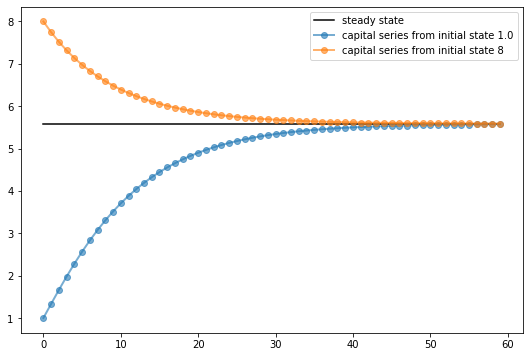

In [35]:
# We use the class to compute time series and the common steady state from two different initial conditions

s1 = Solow()
s2 = Solow(k=8)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy

for s in s1, s2:
    lb = f'capital series from initial state {s.k}' # s.k ???
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
    
ax.legend()
plt.show()

## 3.3 Example3: A Market
1. For Example 3, we write a simple one good market where agents are price takers.
   - The market consists of
     - A linear demand curve $Q = a_d - b_d p$
     - A linear supply curve $Q = a_z + b_z (p-t)$
     - where
       - $p$ is (**PI: the**) price paid by the consumer,
       - $Q$ is (**PI: the**) quantity,
       - $t$ is a per-unit tax.
       - Other symbols are demand and supply parameters.
    - The class provides methods to compute various values of interest, including 
      - competitive equilibrium price and quantity, 
      - tax revenue raised,
      - consumer surplus and producer surplus.
2. Here's our implementation.
   - It uses a function from SciPy, called quad for numerical integration. 
     - We will discuss it later on.
   - Applications
     - Program 1 uses this class to plot an inverse demand curve together with inverse supply curves with and without taxes
     - Program 2 provides a function that
       - takes an instance of `Market` as a parameter, and
       - computes **dead (**PI: (no space)**)weight loss** from the imposition of the tax.

In [56]:
from scipy.integrate import quad

class Market:
    
    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters. All parameters are scalars (?).
        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')
            
    def price(self):
        "Return equilibrium price"
        return (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)
    
    def quantity(self):
        "Compute equilibrium quantity"
        return self.ad - self.bd * self.price()
    
    def consumer_surp(self):
        "Compute consumer surplus"
        
        # Compute (the) area under (the) inverse demand function
        integrand = lambda x: (self.ad /self.bd ) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()
    
    def producer_surp(self):
        "Compute producer surplus"
        
        # Compute (the) area above inverse supply curve, excluding tax
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price()-self.tax) * self.quantity() - area
    
    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()
    
    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd) * x
    
    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az /self.bz) + (1 /self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return - (self.az / self.bz ) + (1 / self.bz) * x

In [57]:
# Value Assignment and Compute equilibrium price

baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params) # Why there is a star? PI: clarify the usage of * in *baseline_params
print("equilibrium price = ", m.price())

# Compute equilibrium quantity
print("consumer surplus = ", m.consumer_surp())

equilibrium price =  18.5
consumer surplus =  33.0625


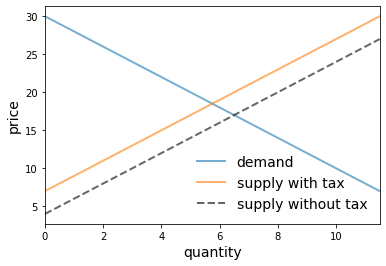

In [58]:
# Program 1

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply with tax')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [61]:
# Program 2
def deadw(m):
    "Computes deadweight loss for market m."
    
    # Create analogous market with no tax
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0) # Use values stored in Class
    
    # Compare surplus, return difference
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [62]:
# A usage of Program 2
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)

1.125

## 3.4 Example4: Chaos
1. For Example 4, we write a simple class for **chaotic dynamics in nonlinear systems**.
   - One simple transition rule that can generate complex dynamics is the **logistic map**
   $$
   x_{t+1} = r x_t (1 - x_t) \tag{2}
   $$
   - where
     - $x_0 \in [0, 1]$,
     - $r \in [0, 4]$
2. The implementation sees the following:
   - Program 1 plots a longeer trajectory.
   - Program 2 provides a bifurcation diagram.
     - On the horizontal axis is the parameter $r$ in (2), and the vertical axis is the state space $[0, 1]$.
     - For each $r$(**PI:,**) we compute a long time series and then plot the tail (the last 50 points).
       - Why the tail of the sequence: the **tail of the sequence** shows us where the trajectory concentrates after settling down to some kind of **steady state**, if a steady state exists.
     - Whether it settles down, and the character of the steady state to which it does settle down, depend on the value of $r$.
       - For $r$ between $2.5$ and $3$, the time series settles into a **single fixed point** plotted on the vertical axis.
       - For $r$ between $3$ and $3.45$, the time series settles down to **oscillating** between the **two values** plotted on the vertical axis.
       - For $r$ a little bit higher than $3.45$, the time series settles down to **oscillating** among the **four values** plotted on the vertical axis.
       - Notice that there is no value of $r$ that leads to a steady state oscillating among three values. (**PI: Clarification needed???**)

In [254]:
class Chaos:
    """
    It models the dynamical system with `x_{t+1} = r * x_t * (1 - x_t)`
    """
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x = self.r * self.x * (1 - self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

In [255]:
ch = Chaos(0.1, 4.0)  # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

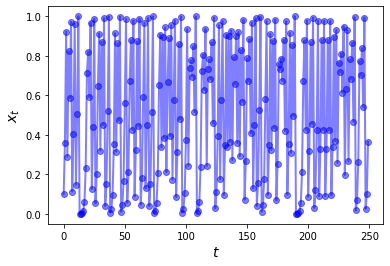

In [256]:
# Program 1
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

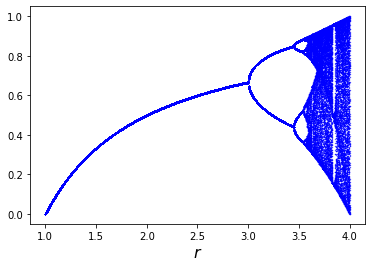

In [258]:
# Program 2
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 1
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.001
    
ax.set_xlabel('$r$', fontsize=16) # y label required?
plt.show()

# 4 Special Methods to define callable instances
1. Python provides **special methods** with which some neat tricks can be performed.
   - e.g.1, 
     - Recall that **lists and tuples** have a notion of **length** and that this **length** can be queried via the **`len` function**, see Part 1.
     - If we want to provide a return value for the `len` function when applied to your user-defined object, use the `__len__` special method, see Part 2 (**This is a customizing process**).
   - A special method we will use regularly is the `__call__` method.
     - This method can be used to **make our instances callable**, just **like functions**.

In [78]:
# Part 1
x = (10, 20, 10)
len(x)

3

In [81]:
# Part 2
class Foo:
    
    def __len__(self):
        return 42

f = Foo()
len(f)

42

In [83]:
# Part 3
class Foo:
    
    def __call__(self, x):
        return x + 42

f = Foo()
f(8) # Exactly equivalent to f.__call__

50

In [85]:
f.__call__(8)

50

# 5 Exercises and Solutions

### Exercise 1

The [empirical cumulative distribution function (ecdf)](https://en.wikipedia.org/wiki/Empirical_distribution_function) corresponding to a sample $ \{X_i\}_{i=1}^n $ is defined as


<a id='equation-emdist'></a>
$$
F_n(x) := \frac{1}{n}  \sum_{i=1}^n \mathbf{1}\{X_i \leq x\}
  \qquad (x \in \mathbb{R}) \tag{3}
$$

Here $ \mathbf{1}\{X_i \leq x\} $ is an indicator function (one if $ X_i \leq x $ and zero otherwise)
and hence $ F_n(x) $ is the fraction of the sample that falls below $ x $.

The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $ F_n $ converges to the true distribution function $ F $.

Implement $ F_n $ as a class called `ECDF`, where

- A given sample $ \{X_i\}_{i=1}^n $ are the instance data, stored as `self.observations`.  
- The class implements a `__call__` method that returns $ F_n(x) $ for any $ x $.  


Your code should work as follows (modulo randomness)

In [114]:
# PI3: wierd conversion in the jupyter notebook

from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

[0.30362378967148007,
 0.06505201545752881,
 0.0021948437289728284,
 0.9298179956148758,
 0.7274474298509132,
 0.44614878818370696,
 0.871079383575385,
 0.03243806807433114,
 0.8890090095786823,
 0.5847107394613417]

In [ ]:
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

In [115]:
class ECDF:
    
    def __init__(self, sample):
        self.observations = sample
        
    def __call__(self, x):
        f = 0
        i = 0
        while i < len(self.observations)-1:
            if self.observations[i] <= x:
                f += 1
            i += 1
        F = f / len(self.observations)
        return F

In [128]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

0.6

In [117]:
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

0.521

In [118]:
class ECDF:
    
    def __init__(self, sample):
        self.observations = sample
        
    def __call__(self, x):
        f = 0
        for i in self.observations:
            if i <= x:
                f += 1
        F = f / len(self.observations)
        return F

In [129]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

0.5

In [130]:
F.observations = [uniform(0, 1) for i in range(100000000)]
F(0.5)

0.49991784

### Exercise 2

In an [earlier exercise](https://python.quantecon.org/python_essentials.html#pyess-ex2), you wrote a function for evaluating polynomials.

This exercise is an extension, where the task is to build a simple class called `Polynomial` for representing and manipulating polynomial functions such as


<a id='equation-polynom'></a>
$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n
    \qquad (x \in \mathbb{R}) \tag{4}
$$

The instance data for the class `Polynomial` will be the coefficients (in the case of [(4)](#equation-polynom), the numbers $ a_0, \ldots, a_N $).

Provide methods that

1. Evaluate the polynomial [(4)](#equation-polynom), returning $ p(x) $ for any $ x $.  
1. Differentiate the polynomial, replacing the original coefficients with those of its derivative $ p' $ (**PI4: replace "returning the coefficients of its derivative $ p' $"**).  


Avoid using any `import` statements.

In [247]:
class Polynomial:
    
    def __init__(self, coeff):
        self.c = coeff
    
    def p(self, x):
        p=0
        for c, a in enumerate(self.c):
            p = p + a* (x**c)
        return p
    
    def p_d(self):
        new_c = []
        for c, a in enumerate(self.c):
            new_c.append(a * c)
        del new_c[0]
        self.c = new_c # PI: this line seems useless
        return self.c

In [248]:
coeff = [1, 1, 1, 1, 1, 1]
f = Polynomial(coeff)

In [249]:
f.p(1)

6

In [250]:
f.p_d()

[1, 2, 3, 4, 5]